0     0
1     0
2     0
3     0
4     0
5    69
6     5
7     5
8     0
9     0
dtype: int64
       0     1      2      3     4      5    6    7
0    125   256   6000  256.0  16.0  128.0  198  199
1     29  8000  32000   32.0   8.0   32.0  269  253
2     29  8000  32000   32.0   8.0   32.0  220  253
3     29  8000  32000   32.0   8.0   32.0  172  253
4     29  8000  16000   32.0   8.0   16.0  132  132
..   ...   ...    ...    ...   ...    ...  ...  ...
204  124  1000   8000    NaN   1.0    8.0   42   37
205   98  1000   8000   32.0   2.0    8.0   46   50
206  125  2000   8000    NaN   2.0   14.0   52   41
207  480   512   8000   32.0   NaN    NaN   67   47
208  480  1000   4000    NaN   NaN    NaN   45   25

[209 rows x 8 columns]
0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
dtype: int64
A
            0         1         2         3         4         5         6  \
0    0.072825  0.006012  0.092843  1.000000  0.294118  0.725714  0.167832   
1    0.008092  0.248497  0.499499 

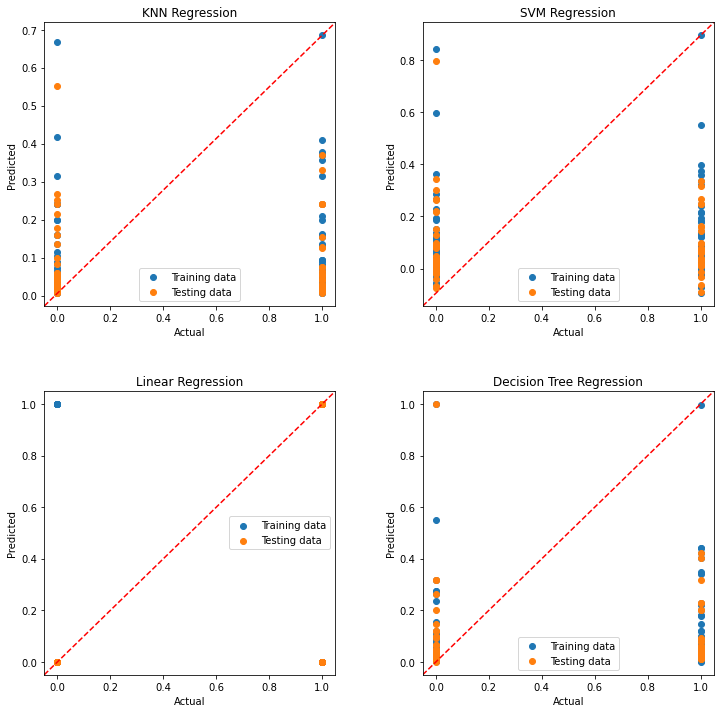

<bound method Artist.set of <AxesSubplot:xlabel='Predicted label'>>

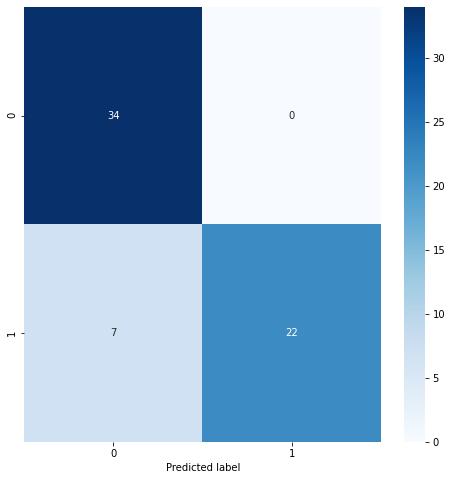

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# read the data into a pandas dataframe
df = pd.read_csv("cpudata.data", delimiter='\t', header=None, na_values="0")
print(df.isna().sum())
df=df.drop([0, 1], axis=1)
df.columns = range(df.shape[1])
print(df)

from sklearn.impute import SimpleImputer
df_i=pd.DataFrame(SimpleImputer(strategy="mean").fit_transform(df))
print(df_i.isna().sum())

from sklearn.preprocessing import MinMaxScaler ##MinMaxScaler is for Normalisation
df_i=pd.DataFrame(MinMaxScaler().fit_transform(df_i))
print("A")
print(df_i)

target=df_i[6]
data=df_i.drop(columns=[6])
print(target.shape, data.shape)

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(data, target, test_size=0.3)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

# KNN regression algorithm
from sklearn.neighbors import KNeighborsRegressor
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(x_train, y_train)
knn_train_pred=knn_model.predict(x_train)
knn_test_pred=knn_model.predict(x_test)

# SVM regression algorithm
from sklearn.svm import SVR
svm_model=SVR(kernel='linear')
svm_model.fit(x_train, y_train)
svm_train_pred=svm_model.predict(x_train)
svm_test_pred=svm_model.predict(x_test)

# Decision Tree regression algorithm
from sklearn.tree import DecisionTreeRegressor
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(x_train, y_train)
dt_train_pred=dt_model.predict(x_train)
dt_test_pred=dt_model.predict(x_test)

# Linear regression algorithm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
model=LinearRegression()
model.fit(x_train, y_train)
train_pred=model.predict(x_train)
test_pred=model.predict(x_test)

# Evaluate performance of all three models
print("KNN Results:")
print("MSE for training: ", mean_squared_error(y_train, knn_train_pred))
print("MSE for testing: ", mean_squared_error(y_test, knn_test_pred))
print("R2 score for training: ", r2_score(y_train, knn_train_pred))
print("R2 score for testing: ", r2_score(y_test, knn_test_pred))

print("\nSVM Results:")
print("MSE for training: ", mean_squared_error(y_train, svm_train_pred))
print("MSE for testing: ", mean_squared_error(y_test, svm_test_pred))
print("R2 score for training: ", r2_score(y_train, svm_train_pred))
print("R2 score for testing: ", r2_score(y_test, svm_test_pred))

print("\nLinear Regression Results:")
print("MSE for training: ", mean_squared_error(y_train, train_pred))
print("MSE for testing: ", mean_squared_error(y_test, test_pred))
print("R2 score for training: ", r2_score(y_train, train_pred))
print("R2 score for testing: ", r2_score(y_test, test_pred))

# Evaluate performance of decision tree model
print("\nDecision Tree Results:")
print("MSE for training: ", mean_squared_error(y_train, dt_train_pred))
print("MSE for testing: ", mean_squared_error(y_test, dt_test_pred))
print("R2 score for training: ", r2_score(y_train, dt_train_pred))
print("R2 score for testing: ", r2_score(y_test, dt_test_pred))

# Logistic regression algorithm
from sklearn.linear_model import LogisticRegression

# convert the target variable to binary values for logistic regression
target_bin = np.where(target > target.median(), 1, 0)

# split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(data, target_bin, test_size=0.3)

# fit the logistic regression model
logistic_model = LogisticRegression()
logistic_model.fit(x_train, y_train)

# make predictions on the training and testing sets
train_pred = logistic_model.predict(x_train)
test_pred = logistic_model.predict(x_test)

# evaluate the performance of the model
print("\nLogistic Regression Results:")
print("Accuracy for training: ", logistic_model.score(x_train, y_train))
print("Accuracy for testing: ", logistic_model.score(x_test, y_test))


# plot actual vs predicted values for each model
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(12, 12))
plt.subplots_adjust(wspace=0.3, hspace=0.3)

# plot KNN model
axs[0, 0].scatter(y_train, knn_train_pred, label="Training data")
axs[0, 0].scatter(y_test, knn_test_pred, label="Testing data")
axs[0, 0].plot([0, 1], [0, 1], transform=axs[0, 0].transAxes, ls="--", c="red")
axs[0, 0].set_xlabel("Actual")
axs[0, 0].set_ylabel("Predicted")
axs[0, 0].set_title("KNN Regression")

# plot SVM model
axs[0, 1].scatter(y_train, svm_train_pred, label="Training data")
axs[0, 1].scatter(y_test, svm_test_pred, label="Testing data")
axs[0, 1].plot([0, 1], [0, 1], transform=axs[0, 1].transAxes, ls="--", c="red")
axs[0, 1].set_xlabel("Actual")
axs[0, 1].set_ylabel("Predicted")
axs[0, 1].set_title("SVM Regression")

# plot linear regression model
axs[1, 0].scatter(y_train, train_pred, label="Training data")
axs[1, 0].scatter(y_test, test_pred, label="Testing data")
axs[1, 0].plot([0, 1], [0, 1], transform=axs[1, 0].transAxes, ls="--", c="red")
axs[1, 0].set_xlabel("Actual")
axs[1, 0].set_ylabel("Predicted")
axs[1, 0].set_title("Linear Regression")

# plot decision tree model
axs[1, 1].scatter(y_train, dt_train_pred, label="Training data")
axs[1, 1].scatter(y_test, dt_test_pred, label="Testing data")
axs[1, 1].plot([0, 1], [0, 1], transform=axs[1, 1].transAxes, ls="--", c="red")
axs[1, 1].set_xlabel("Actual")
axs[1, 1].set_ylabel("Predicted")
axs[1, 1].set_title("Decision Tree Regression")

# add legend
for ax in axs.flat:
    ax.legend()

# show plot
plt.show()


from sklearn.metrics import confusion_matrix
import seaborn as sns

# compute confusion matrix for logistic regression model
cm = confusion_matrix(y_test, test_pred)

# plot confusion matrix
fig, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
ax.set_xlabel("Predicted label")
ax.set

